# Проверка гипотез по увеличению выручки в интернет-магазине — оценить результаты A/B теста

**Входные данные** — таблица с данными о заказах, посещениях, гипотезах

**Цели проекта:**

1. Приоритизация гипотез:
   - Определить приоритеты гипотез для увеличения выручки в интернет-магазине с использованием фреймворков ICE и RICE.
   - Сравнить результаты приоритизации гипотез с использованием двух разных фреймворков.

2. Анализ A/B-теста:
   - Оценить результаты A/B-теста, проведенного в интернет-магазине.
   - Изучить кумулятивную выручку, средний чек, относительное изменение среднего чека, кумулятивное среднее количество заказов на посетителя.
   - Исследовать точечные графики заказов по пользователям и стоимостей заказов.
   - Проанализировать статистическую значимость различий между группами по среднему количеству заказов на посетителя и среднему чеку заказа.
   - Принять решение на основе результатов теста и определить следующие шаги.

**Задачи проекта:**

*Часть 1. Приоритизация гипотез:*

1.1. Применить фреймворк ICE для приоритизации гипотез.

1.2. Отсортировать гипотезы по убыванию приоритета с использованием фреймворка ICE.

1.3. Применить фреймворк RICE для приоритизации гипотез.

1.4. Отсортировать гипотезы по убыванию приоритета с использованием фреймворка RICE.

1.5. Сравнить приоритеты гипотез, полученные с помощью ICE и RICE, и объяснить изменения.

*Часть 2. Анализ A/B-теста:*

2.1. Построить график кумулятивной выручки по группам и сделать выводы.

2.2. Построить график кумулятивного среднего чека по группам и сделать выводы.

2.3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A и сделать выводы.

2.4. Построить график кумулятивного среднего количества заказов на посетителя по группам и сделать выводы.

2.5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к 
группе A и сделать выводы.

2.6. Построить точечный график количества заказов по пользователям и сделать выводы.

2.7. Рассчитать 95-й и 99-й перцентили количества заказов на пользователя и выбрать границу для определения аномальных пользователей.

2.8. Построить точечный график стоимостей заказов и сделать выводы.

2.9. Рассчитать 95-й и 99-й перцентили стоимости заказов и выбрать границу для определения аномальных заказов.

2.10. Рассчитать статистическую значимость различий в среднем количестве заказов на посетителя и среднем чеке заказа между группами по "сырым" данным.

2.11. Рассчитать статистическую значимость различий в среднем количестве заказов на посетителя и среднем чеке заказа между группами по "очищенным" данным.

2.12. Принять решение на основе результатов теста и объяснить его.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import scipy.stats as stats


pd.set_option('display.max_colwidth', None)# для расширения столбцов

## Приоритизация гипотез

Загрузим файл с гипотезами 

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### Фреймворк ICE для приоритизации гипотез

Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

Формула для расчета : **ICE score** = Влияние * Уверенность в успехе / Объём затраченных на реализацию усилий.

In [4]:
hypothesis['ice'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'],1)
hypothesis_ice = hypothesis.sort_values(by=['ice'], ascending=False)
hypothesis_ice

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


### Фреймворк RICE для приоритизации гипотез

Применим фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.

Формула для расчета : **RICE** = Охват аудитории * Влияние * Уверенность в успехе / Объём затраченных на реализацию усилий.

In [5]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
hypothesis_rice = hypothesis.sort_values(by=['rice'], ascending=False)
hypothesis_rice

,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


### Анализ причин изменения приоритизации гипотез

Определим причину изменения приоритизации гипотез при применении RICE вместо ICE.

In [6]:
# Создадим таблицу, в которой будут только названия гипотез и баллы ICE (гипотезы отсортированы по приоритету на основе баллов ICE)
table_ice = hypothesis_ice[['hypothesis', 'ice']]
table_ice

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


In [7]:
# Создадим таблицу, в которой будут только названия гипотез и баллы RICE (гипотезы отсортированы по приоритету на основе баллов RICE)
table_rice = hypothesis_rice[['hypothesis', 'rice']]
table_rice

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [8]:
index_table_ice = table_ice.reset_index()[['index']]
index_table_rice = table_rice.reset_index()[['index']]
index_table_rice

,index
0,7
1,2
2,0
3,6
4,8
5,3
6,1
7,5
8,4


Сравним полученные рейтинги гипотез на основании разных методик приоритизации гипотез

In [9]:
comparison = pd.concat([index_table_ice,index_table_rice], axis=1)
comparison

,index,index
0,8,7
1,0,2
2,7,0
3,6,6
4,2,8
5,1,3
6,5,1
7,3,5
8,4,4


In [10]:
#Удалим индексы для успешного применения concat 
table_ice = table_ice.reset_index(drop=True)

In [11]:
#Удалим индексы для успешного применения concat 
table_rice = table_rice.reset_index(drop=True)

In [12]:
comparison = pd.concat([table_ice,table_rice], axis=1)
comparison

,hypothesis,ice,hypothesis,rice
0,"Запустить акцию, дающую скидку на товар в день рождения",16.2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
1,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
2,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
4,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0,"Запустить акцию, дающую скидку на товар в день рождения",16.2
5,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
6,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
7,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


**Вывод:** Результаты варьируются из-за различий в методиках приоритизации гипотез. 

Основное отличие заключается в том, что метод RICE учитывает оценку влияния изменений на количество пользователей, которых это затронет. Чем больше пользователей, тем выше приоритет гипотезы согласно RICE. 

В случае ICE этот аспект не учитывается и оценивается только внутренний потенциал гипотезы. Это объясняет различия в рейтинге гипотез между этими методами.

**Если гипотеза имеет высокий ICE Score, но низкий RICE Score**, это может указывать на то, что, хотя она и влиятельна и легко выполнима, охват у неё ограничен (например, затрагивает меньшее количество клиентов).

**Если гипотеза имеет высокий RICE Score, но относительно низкий ICE Score**, это может говорить о том, что, несмотря на более сложное выполнение или меньшую уверенность в успехе, она затрагивает большее количество пользователей или клиентов.

Важно заметить, что гипотезы с номерами 7, 0 и 6 занимают ведущие позиции в нашем списке при использовании обеих методик оценки, несмотря на различия в их приоритетах в зависимости от выбранного фреймворка. В то же время, гипотезы под номерами 4, 5, 3 и 1 в обеих методиках оценки показывают себя как менее приоритетные.

## Анализ A/B-теста

### Предобработка данных

In [13]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [15]:
visitors = pd.read_csv('/datasets/visitors.csv')

В таблице посещений и покупок столбец date имеет тип object.
Изменим тип на  datetime64

In [16]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [17]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x,'%Y-%m-%d'))

Проверим правильно ли распределены группы (возможно id пользователя будет в группе A и B одновременно)

In [18]:
group_counts = orders.groupby('visitorId')['group'].nunique()
duplicate_groups = group_counts[group_counts > 1]
duplicate_groups.count()

58

Действительно некоторые пользователи попали и в группу A и в группу B. Такое перекрытие может повлиять на точность и надежность результатов нашего анализа, поэтому мы должны исключить данные ,  которые связанны с этими участниками, из дальнейшего рассмотрения.

В A/B тестировании важно, чтобы участник был случайно и исключительно отнесен только к одной группе - либо к контрольной (A), либо к экспериментальной (B). Это обеспечивает чистоту эксперимента и правильность последующего анализа данных. 


In [19]:
orders['visitorId'].count()

1197

In [20]:
round((100*116/1197),2)

9.69

In [21]:
# перезаписываем orders

duplicate_visitors = group_counts[group_counts > 1].index

# Теперь мы должны использовать этот список индексов (visitorId), чтобы исключить их из основного DataFrame
orders = orders[~orders['visitorId'].isin(duplicate_visitors)]
orders['visitorId'].count()


1016

Мы очистили данные, чтобы обеспечить справедливый и равный анализ результатов.

Каждая группа должна быть представлена уникальными участниками, чтобы можно было четко сравнить влияние каждой группы на поведение участников.

### Создание кумулятивной таблицы

Создадим таблицу посещений по дням группы А

In [22]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']
visitorsADaily.head()

,date,visitorsPerDateA
0,2019-08-01,719
1,2019-08-02,619
2,2019-08-03,507
3,2019-08-04,717
4,2019-08-05,756


Посчитаем количество визитов с накомплением по дням для группы А

In [23]:
days_data_v_A = []

for date in visitorsADaily['date'].values:
   
    visitors_df_A = visitorsADaily[(visitorsADaily['date'] <= date)]
    
    day_Cummulative_A = (
        visitors_df_A
        .agg({'visitorsPerDateA' : 'sum'})
    )
   
    day_Cummulative_A['date'] = date
   
    days_data_v_A.append(day_Cummulative_A)


Cummulative_A= pd.DataFrame(days_data_v_A)
Cummulative_A = Cummulative_A.sort_values(by=['date'])

columns = ['date', 'visitorsPerDateA']

visitorsACummulative = Cummulative_A[columns]
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsACummulative.head()

,date,visitorsCummulativeA
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


Создадим таблицу посещений по дням группы B

In [24]:
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
visitorsBDaily.head()

,date,visitorsPerDateB
31,2019-08-01,713
32,2019-08-02,581
33,2019-08-03,509
34,2019-08-04,770
35,2019-08-05,707


Посчитаем количество визитов с накомплением по дням для группы B

In [25]:
days_data_v_B = []

for date in visitorsBDaily['date'].values:
   
    visitors_df_B = visitorsBDaily[(visitorsBDaily['date'] <= date)]
    
    day_Cummulative_B = (
        visitors_df_B
        .agg({'visitorsPerDateB' : 'sum'})
    )
   
    day_Cummulative_B['date'] = date
   
    days_data_v_B.append(day_Cummulative_B)#сам список куда добавляем.append(значение)


Cummulative_B= pd.DataFrame(days_data_v_B)
Cummulative_B = Cummulative_B.sort_values(by=['date'])

columns = ['date', 'visitorsPerDateB']

# а вот так перетасовать колонки
visitorsBCummulative = Cummulative_B[columns]
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

visitorsBCummulative.head()

,date,visitorsCummulativeB
0,2019-08-01,713
1,2019-08-02,1294
2,2019-08-03,1803
3,2019-08-04,2573
4,2019-08-05,3280


Посчитаем количество заказов и выручку по дням группы А

In [26]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
ordersADaily.head()

,date,ordersPerDateA,revenuePerDateA
0,2019-08-01,23,142779
1,2019-08-02,19,91602
2,2019-08-03,24,112473
3,2019-08-04,11,41176
4,2019-08-05,22,86383


Посчитаем накопительную часть количество заказов и выручку по дням группы А

In [27]:
df_A = []

for date in ordersADaily['date'].values:
   
    revenue_com_A = ordersADaily[(ordersADaily['date'] <= date)]
    
    revenue_Cummulative_A = (
        revenue_com_A
        .agg({'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'})
    )
   
    revenue_Cummulative_A['date'] = date
   
    df_A.append(revenue_Cummulative_A)

Cummulative_A_revenue= pd.DataFrame(df_A)
Cummulative_A_revenue = Cummulative_A_revenue.sort_values(by=['date'])
Cummulative_A_revenue

columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


# а вот так перетасовать колонки
ordersACummulative = Cummulative_A_revenue[columns]
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersACummulative.head()

,date,ordersCummulativeA,revenueCummulativeA
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


Посчитаем количество заказов и выручку по дням группы B

In [28]:
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
ordersBDaily.head()

,date,ordersPerDateB,revenuePerDateB
0,2019-08-01,17,59758
1,2019-08-02,23,162043
2,2019-08-03,14,67049
3,2019-08-04,14,96890
4,2019-08-05,21,89908


Посчитаем накопительное количество заказов и выручку по дням группы B

In [29]:
df_B = []

for date in ordersBDaily['date'].values:
   
    revenue_com_B = ordersBDaily[(ordersBDaily['date'] <= date)]
    
    revenue_Cummulative_B = (
        revenue_com_B
        .agg({'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'})
    )
   
    revenue_Cummulative_B['date'] = date
   
    df_B.append(revenue_Cummulative_B)

Cummulative_B_revenue= pd.DataFrame(df_B)
Cummulative_B_revenue = Cummulative_B_revenue.sort_values(by=['date'])
Cummulative_B_revenue

columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# а вот так перетасовать колонки
ordersBCummulative = Cummulative_B_revenue[columns]
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

ordersBCummulative.head()

,date,ordersCummulativeB,revenueCummulativeB
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


Объединим таблицы

In [30]:
data = (
    ordersADaily
    .merge(ordersBDaily,  on='date', how='left')
    .merge(ordersACummulative, on='date', how='left')
    .merge(ordersBCummulative, on='date', how='left')
    .merge(visitorsADaily, on='date', how='left')
    .merge(visitorsBDaily,  on='date', how='left')
    .merge(visitorsACummulative,  on='date', how='left')
    .merge(visitorsBCummulative,  on='date', how='left')
)

print(data.head(5)) 

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

У нас получилась информативная таблица с заказами/выручкой/посещениями по группам и их накопление

### График кумулятивной выручки по группам

Построим график кумулятивной выручки по группам.

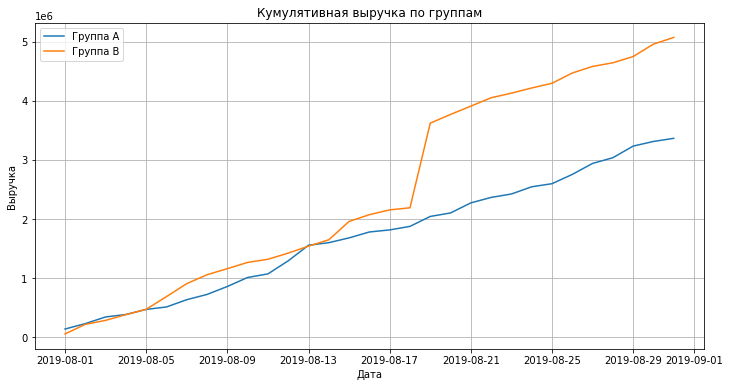

In [31]:
# Устанавливаем размер фигуры перед построением графика
plt.figure(figsize=(12, 6)) 
# Строим график выручки группы А
plt.plot(data['date'], data['revenueCummulativeA'], label='Группа А')

# Строим график выручки группы B
plt.plot(data['date'], data['revenueCummulativeB'], label='Группа В')

# Добавление названий осей и заголовка
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()
plt.grid()


**Выводы и предположения** 

Исходя из анализа данных:

Зафиксировано постепенное увеличение дохода в течение периода проведения эксперимента в группе А испытания,однако у группы B после 18 августа на графике выручка резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

### График кумулятивного среднего чека по группам

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

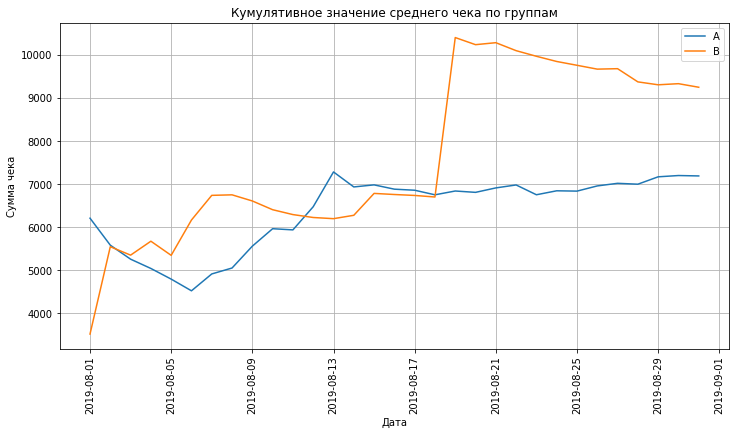

In [32]:
# Устанавливаем размер фигуры перед построением графика
plt.figure(figsize=(12, 6)) 
plt.plot(data['date'], data['revenueCummulativeA']/data['ordersCummulativeA'], label='A')
plt.plot(data['date'], data['revenueCummulativeB']/data['ordersCummulativeB'], label='B')

# Добавление названий осей и заголовка
plt.title('Кумулятивное значение среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Сумма чека')
plt.legend()
plt.grid()
# Поворот подписей на оси X на 90 градусов и предотвращение вывода результатов
_ = plt.xticks(rotation=90)

plt.xticks(rotation=90);

**Выводы и предположения**  к заключительной фазе испытания показатели в каждой из групп приходят к устойчивому состоянию. На этом графике так же заметен резкий скачек суммы чека у двух групп и это может сигнализировать о появлении очень дорогих заказов в выборке. 

### График относительного изменения кумулятивного среднего чека группы B к группе A

Построим график относительного изменения кумулятивного среднего чека группы B к группе A. 

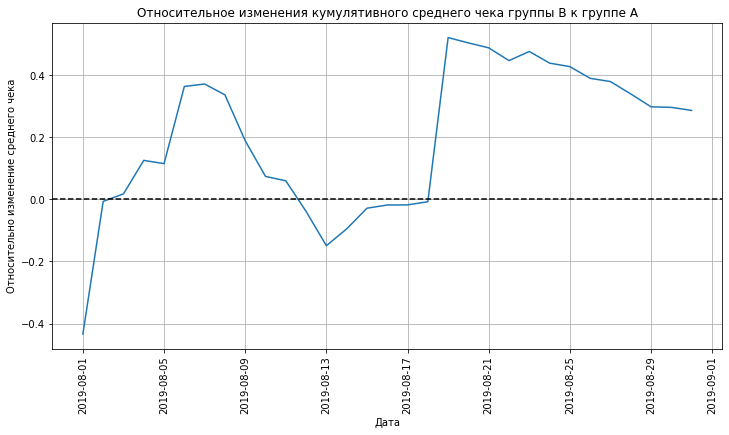

In [33]:
# Устанавливаем размер фигуры перед построением графика
plt.figure(figsize=(12, 6)) 
# cтроим отношение средних чеков
plt.plot(data['date'], (data['revenueCummulativeB']/data['ordersCummulativeB'])/(data['revenueCummulativeA']/data['ordersCummulativeA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
# Добавление названий осей и заголовка
plt.title('Относительное изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительно изменение среднего чека')
plt.grid()
# Поворот подписей на оси X на 90 градусов и предотвращение вывода результатов
_ = plt.xticks(rotation=90)

plt.xticks(rotation=90);

**Выводы и предположения** к концу теста средний чек группы B превышает A проблищительно на 30 процентов, но заметны резкие выбросы надо проверить на аномалии 

### График кумулятивного среднего количества заказов на посетителя по группам

Построим график кумулятивного среднего количества заказов на посетителя по группам. 

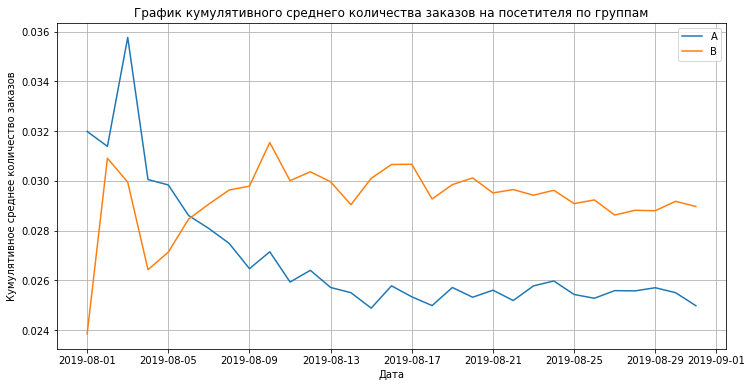

In [34]:
# считаем среднее количество заказов на посетителя
data['conversion_a'] = data['ordersCummulativeA']/data['visitorsCummulativeA']
data['conversion_b'] = data['ordersCummulativeB']/data['visitorsCummulativeB']

# Устанавливаем размер фигуры перед построением графика
plt.figure(figsize=(12, 6)) 
# строим графики
plt.plot(data['date'], data['conversion_a'], label='A')
plt.plot(data['date'], data['conversion_b'], label='B')
plt.legend()

# Добавление названий осей и заголовка
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов')
plt.grid()

**Выводы и предположения:**

1) У группы А после 3 авгуса число заказов на посетителя резко сокращается и больше не растет
2) у группы В приблизительно среднее количество заказов на одном уровне

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

No handles with labels found to put in legend.


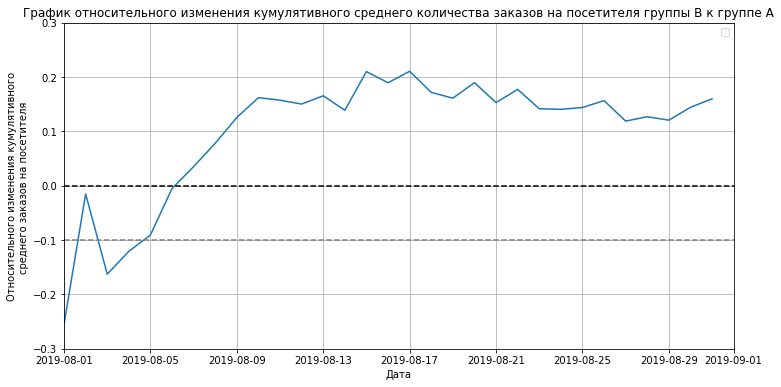

In [35]:
# Устанавливаем размер фигуры перед построением графика
plt.figure(figsize=(12, 6)) 
plt.plot(data['date'], data['conversion_b']/data['conversion_a']-1)
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.3, 0.3])
# Добавление названий осей и заголовка
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительного изменения кумулятивного\nсреднего заказов на посетителя ')
plt.grid()

**Выводы и предположения**  количество среднего количества заказов на посетителя больше у группы В как минимум на 12 процентов чем у А

### Точечный график количества заказов по пользователям

Создадим таблицу с количеством заказов по пользователю

In [36]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsers.columns = ['visitorId', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,visitorId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Построим точечный график количества заказов по пользователям.

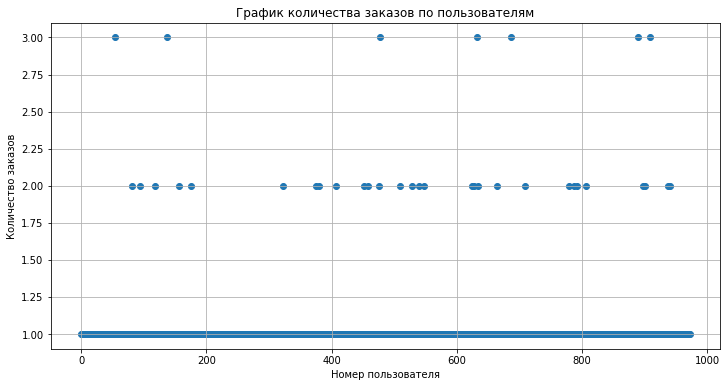

In [37]:
# Устанавливаем размер фигуры перед построением графика
plt.figure(figsize=(12, 6)) 
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

# Добавление названий осей и заголовка
plt.title('График количества заказов по пользователям')
plt.xlabel('Номер пользователя')
plt.ylabel('Количество заказов')
plt.grid()

**Выводы и предположения** В среднем на одного пользователя 1 заказ, максимум 2.

Стоит определить аномальных пользователей и отсеить их (возможно они влияют на анализ). Для этого необходимо посчитать выборочные перцентили количества заказов на одного пользователя.

### 95-й и 99-й перцентили количества заказов на пользователя

Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [38]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 2.]


95 процентов пользователей имеют по 1 заказу 

остальные 4 процента 2

3 и более заказов оформлял только один процент пользователей

На основании этого логично выбрать 1 заказ на одного пользователя за нижнюю границу "нормального" числа заказов, и отсеять аномальных пользователей.

### Точечный график стоимостей заказов.

Построим точечный график стоимостей заказов.

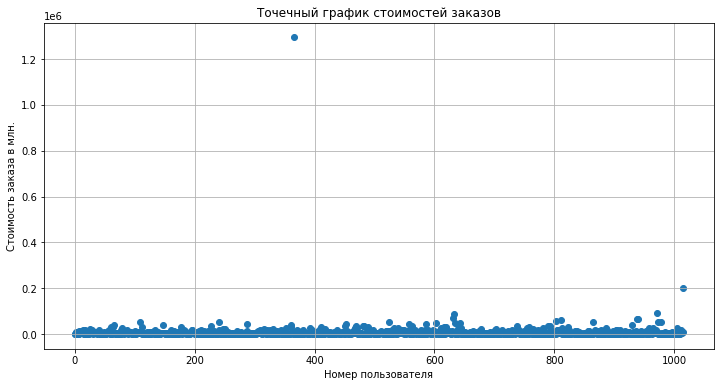

In [39]:
# Устанавливаем размер фигуры перед построением графика
plt.figure(figsize=(12, 6)) 
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Номер пользователя')
plt.ylabel('Стоимость заказа в млн.')
plt.grid()

**Выводы и предположения** стоимость заказов судя по графику не привышает 50 тыс, если не учитывать аномальные значения. Для уверенности стоит посчитать выборочные перцентили стоимости заказа.

### 95-й и 99-й перцентили стоимости заказов

Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [40]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Нормальная стоимость заказа 27 тыс, сюда попадают 95 процентов заказов
99 процентов заказов до 53 904

Границей для определения аномальных заказов следует обозначить до 26 785.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitorId', 'transactionId']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [41]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']
ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsersB.columns = ['visitorId', 'transactionId'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [42]:
sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])), name='orders')],axis=0)

Выберите подходящий статистический тест. Для этого проверим нормальное ли распределение (если нормальное выбираем тесты Стьюдента/ если нет Манна — Уитни)

Для проверки распределения на нормальность лучше применить критерий Шапиро-Уилка. Он обнаруживает различия между распределениями, если они и правда есть.

In [43]:
alpha = 0.05  # критический уровень статистической значимости

results = stats.shapiro(sampleA)
p_value = results[1]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 


p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Распредление не нормально надо проводить тест Манна — Уитни

Посчитаем статистическую значимость  различий в среднем количестве заказов на посетителя между группами по «сырым» данным

H0:количество заказов на посетителя групп A и B равны, статистически значимых отличий нет 

H1:количество заказов на посетителя групп A и B различны, статистически значимые отличия есть
 
alpha = 0.05 критический уровень статистической значимости

In [44]:
print("p-уровень значимости различий в количестве заказов на посетителя групп A и B {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("относительное различие в среднем количестве заказов группы В относительно А {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


p-уровень значимости различий в количестве заказов на посетителя групп A и B 0.011
относительное различие в среднем количестве заказов группы В относительно А 0.160


Первый результат (p-уровень значимости) указывает на статистическую значимость различий в количестве заказов на посетителя групп A и B.

Второй результат (относительное различие в средних) указывает на то, что количестве заказов на посетителя группы B больше чем группы A  на 16 процентов.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Как было определено ранее, пользователи, совершившие более одного заказа или заказ на сумму свыше 26 785 рублей, будут классифицироваться как аномальные. Для этого создадим отдельные группы: первая — usersWithManyOrders — включит пользователей, оформивших более двух заказов, а вторая — usersWithExpensiveOrders — тех, чьи заказы превысили указанную сумму. Эти две категории будем объединять в одной таблице под названием abnormalUsers

In [45]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > 1]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > 1]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26785]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
86


Получили 86 пользователей которые являются аномалиями и либо имели больше 1 заказа или стоимость их заказа была более 26785,а может и то и другое

Всего 86 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста

In [46]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

H0:количество заказов на посетителя групп A и B равны, статистически значимых отличий нет 

H1:количество заказов на посетителя групп A и B различны, статистически значимые отличия есть
 
alpha = 0.05 критический уровень статистической значимости

In [47]:
print('p-уровень значимости различий в количестве заказов на посетителя групп A и B {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительное различие  в среднем количестве заказов группы  В относительно А {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-уровень значимости различий в количестве заказов на посетителя групп A и B 0.016
относительное различие  в среднем количестве заказов группы  В относительно А 0.174


Количество заказов на посетителя групп A и B различны, статистически значимые отличия есть
Результаты по среднему количеству заказов практически не изменились

### Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

H0:средние чеки на посетителя групп A и B равны, статистически значимых отличий нет 

H1:средние чеки на посетителя групп A и B различны, статистически значимые отличия есть
 
alpha = 0.05 критический уровень статистической значимости

In [48]:
print('p-уровень значимости различий в среднем чеке заказов на посетителя групп A и B {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('относительное различие в  среднем чеке заказов на посетителя группы B относительно А {0:.2f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-уровень значимости различий в среднем чеке заказов на посетителя групп A и B 0.829
относительное различие в  среднем чеке заказов на посетителя группы B относительно А 0.29


Принимаем нулевую гипотезу о том, что средние чеки равны и статистически значимых различий между группами в размере среднего чека нет 

Средний чек группы В больше на 29 процентов группы А, возможно это из-за выбрасов

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 

H0:средние чеки на посетителя групп A и B равны, статистически значимых отличий нет 

H1:средние чеки на посетителя групп A и B различны, статистически значимые отличия есть
 
alpha = 0.05 критический уровень статистической значимости

In [49]:
print(
    'p-уровень значимости различий в среднем чеке заказов на посетителя групп A и B {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "относительное различие в  среднем чеке заказов на посетителя группы B относительно А {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-уровень значимости различий в среднем чеке заказов на посетителя групп A и B 0.727
относительное различие в  среднем чеке заказов на посетителя группы B относительно А -0.034


Принимаем нулевую гипотезу о том, что средние чеки равны и статистически значимых различий между группами в размере среднего чека нет 
А вот благодаря аномалиям определили, что эксперемент с группой В хуже и средний чек группы В по очищенным данным меньше на 3 процента группы А, что говорит о почти равном результате

### Решение по результатам теста

По тестам который написаны выше можно сделать вывод, что:

**Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным** есть

**Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным** присутствует

Количество заказов на посетителя группы B больше чем группы A на ±16 процентов.

**Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным** отсутствует

**Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным** отсутствует

Эксперемент с группой В хуже и средний чек группы В по очищенным данным меньше на 3 процента группы А, что говорит о почти равном результате

На основе анализа данных, тест рекомендуется прекратить, признав его успешным в отношении повышения конверсии в группе B. Что касается среднего чека, нет достаточных оснований для утверждения, что одна из групп превосходит другую. Данные не предполагают, что продолжение теста приведет к существенным изменениям в конверсии или среднем чеке между группами, так как наблюдаемые колебания на графиках постепенно уменьшаются.